In [45]:
# Data Analytics imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering imports
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

In [3]:
#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\WGU\D212\medical_clean.csv')

In [4]:
#Viewing Data to evaluate structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#Detect null values
print(df.isnull().sum())

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
# Look at what type of data is in each column and the name of the columns
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [7]:
# See how many rows and columns are present
df.shape

(10000, 50)

In [8]:
# Change dataframe to only include variables used for analysis
df=df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

In [9]:
# Pull .head again to make sure the new dataframe is correct
df.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,3,3,2,2,4,3,3,4
1,3,4,3,4,4,4,3,3
2,2,4,4,4,3,4,3,3
3,3,5,5,3,4,5,5,5
4,2,1,3,3,5,3,4,3


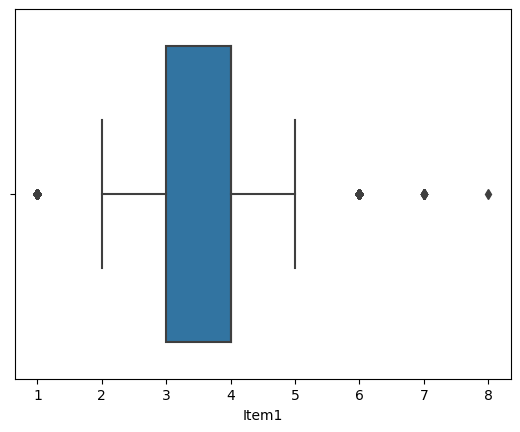

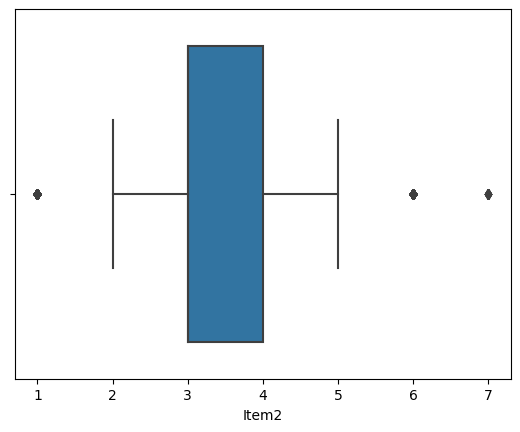

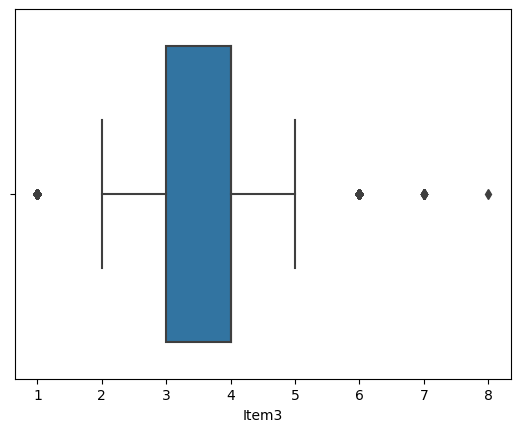

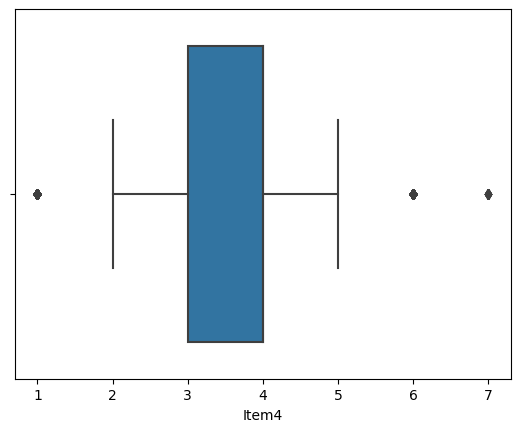

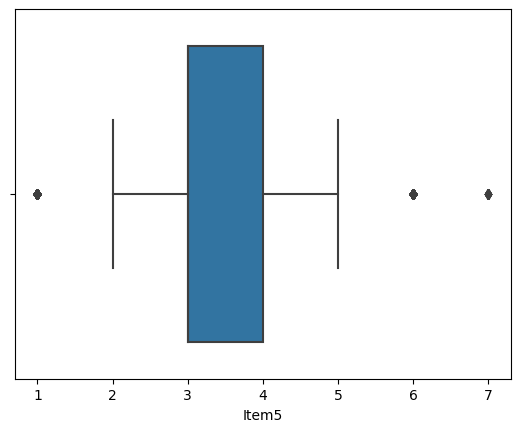

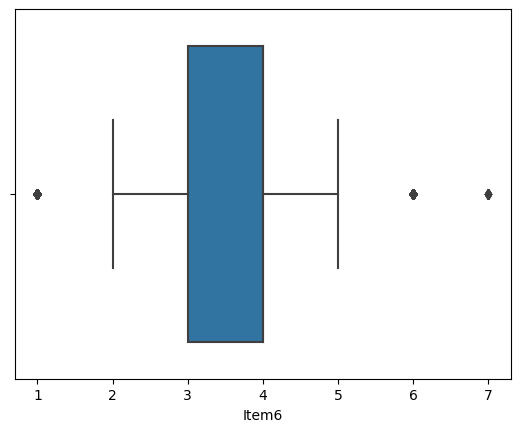

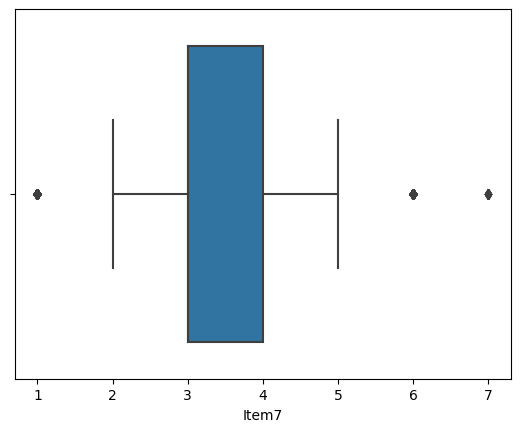

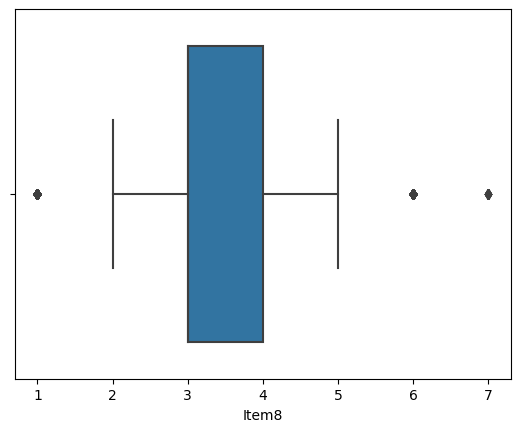

In [10]:
#Detection of outliers for quantitative values
boxplot=sns.boxplot(x='Item1',data=df)
plt.show()
boxplot=sns.boxplot(x='Item2',data=df)
plt.show()
boxplot=sns.boxplot(x='Item3',data=df)
plt.show()
boxplot=sns.boxplot(x='Item4',data=df)
plt.show()
boxplot=sns.boxplot(x='Item5',data=df)
plt.show()
boxplot=sns.boxplot(x='Item6',data=df)
plt.show()
boxplot=sns.boxplot(x='Item7',data=df)
plt.show()
boxplot=sns.boxplot(x='Item8',data=df)
plt.show()

In [11]:
# Counting occurences of each unique value to make sure my inversion works correctly
print('Item1 Unique Value Counts:\n', df['Item1'].value_counts())
print('Item2 Unique Value Counts:\n', df['Item2'].value_counts())
print('Item3 Unique Value Counts:\n', df['Item3'].value_counts())
print('Item4 Unique Value Counts:\n', df['Item4'].value_counts())
print('Item5 Unique Value Counts:\n', df['Item5'].value_counts())
print('Item6 Unique Value Counts:\n', df['Item6'].value_counts())
print('Item7 Unique Value Counts:\n', df['Item7'].value_counts())
print('Item8 Unique Value Counts:\n', df['Item8'].value_counts())

Item1 Unique Value Counts:
 4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64
Item2 Unique Value Counts:
 3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: int64
Item3 Unique Value Counts:
 4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: Item3, dtype: int64
Item4 Unique Value Counts:
 3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: Item4, dtype: int64
Item5 Unique Value Counts:
 4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: Item5, dtype: int64
Item6 Unique Value Counts:
 4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: Item6, dtype: int64
Item7 Unique Value Counts:
 4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: Item7, dtype: int64
Item8 Unique Value Counts:
 3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: Item8, d

In [12]:
# Invert survey data using map() function
inversion_table = {8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8}
# Invert columns and change data type to float, as kmeans failed when running as int64
df["Item1"] = df["Item1"].map(inversion_table)
df["Item1"] = df["Item1"].astype('float64')
df["Item2"] = df["Item2"].map(inversion_table)
df["Item2"] = df["Item2"].astype('float64')
df["Item3"] = df["Item3"].map(inversion_table)
df["Item3"] = df["Item3"].astype('float64')
df["Item4"] = df["Item4"].map(inversion_table)
df["Item4"] = df["Item4"].astype('float64')
df["Item5"] = df["Item5"].map(inversion_table)
df["Item5"] = df["Item5"].astype('float64')
df["Item6"] = df["Item6"].map(inversion_table)
df["Item6"] = df["Item6"].astype('float64')
df["Item7"] = df["Item7"].map(inversion_table)
df["Item7"] = df["Item7"].astype('float64')
df["Item8"] = df["Item8"].map(inversion_table)
df["Item8"] = df["Item8"].astype('float64')

In [13]:
# Comparing this to previous use of .value_counts to make sure inversion worked correctly
print('Item1 Unique Value Counts:\n', df['Item1'].value_counts())
print('Item2 Unique Value Counts:\n', df['Item2'].value_counts())
print('Item3 Unique Value Counts:\n', df['Item3'].value_counts())
print('Item4 Unique Value Counts:\n', df['Item4'].value_counts())
print('Item5 Unique Value Counts:\n', df['Item5'].value_counts())
print('Item6 Unique Value Counts:\n', df['Item6'].value_counts())
print('Item7 Unique Value Counts:\n', df['Item7'].value_counts())
print('Item8 Unique Value Counts:\n', df['Item8'].value_counts())

Item1 Unique Value Counts:
 5.0    3455
6.0    3404
4.0    1377
7.0    1315
3.0     225
8.0     213
2.0      10
1.0       1
Name: Item1, dtype: int64
Item2 Unique Value Counts:
 6.0    3439
5.0    3351
4.0    1421
7.0    1360
8.0     213
3.0     204
2.0      12
Name: Item2, dtype: int64
Item3 Unique Value Counts:
 5.0    3464
6.0    3379
4.0    1358
7.0    1356
3.0     220
8.0     211
2.0      11
1.0       1
Name: Item3, dtype: int64
Item4 Unique Value Counts:
 6.0    3422
5.0    3394
4.0    1388
7.0    1346
3.0     231
8.0     207
2.0      12
Name: Item4, dtype: int64
Item5 Unique Value Counts:
 5.0    3446
6.0    3423
7.0    1380
4.0    1308
3.0     219
8.0     211
2.0      13
Name: Item5, dtype: int64
Item6 Unique Value Counts:
 5.0    3464
6.0    3371
4.0    1403
7.0    1319
3.0     220
8.0     213
2.0      10
Name: Item6, dtype: int64
Item7 Unique Value Counts:
 5.0    3487
6.0    3456
7.0    1345
4.0    1274
8.0     215
3.0     212
2.0      11
Name: Item7, dtype: int64
Item8 Uniq

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Item1   10000 non-null  float64
 1   Item2   10000 non-null  float64
 2   Item3   10000 non-null  float64
 3   Item4   10000 non-null  float64
 4   Item5   10000 non-null  float64
 5   Item6   10000 non-null  float64
 6   Item7   10000 non-null  float64
 7   Item8   10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [15]:
# Calculate means of each item response to see how data varies
df_means = df.agg(['mean']).round(2)

print(df_means)

      Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
mean   5.48   5.49   5.49   5.48    5.5   5.48   5.51   5.49


In [16]:
# Calculate standard deviation of each item response to see how data varies
df_std = df.agg(['std']).round(2)

print(df_std)

     Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
std   1.03   1.03   1.03   1.04   1.03   1.03   1.02   1.04


In [17]:
# Calculate max of each item response to confirm lack of outliers and full use of survey responses
df_max = df.agg(['max']).round(2)

print(df_max)

     Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
max    8.0    8.0    8.0    8.0    8.0    8.0    8.0    8.0


In [18]:
# Calculate min of each item response to confirms lack of outliers and full use of survey responses
df_min = df.agg(['min']).round(2)

print(df_min)

     Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
min    1.0    2.0    1.0    2.0    2.0    2.0    2.0    2.0


In [19]:
#C4. Cleaned Dataset:
# Provide a copy of the cleaned Data Set
df.to_csv(r'C:\Users\mmorg\WGU\D212\d212_task1_clean.csv')

Part IV: Analysis

D.  Perform the data analysis and report on the results by doing the following:

D1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

As stated previously I decided to use hierarchical clustering for this analysis. Through the course materials I learned about the three methods that can be used for hierarchical clustering and those are; single, complete, and ward. When trying to use the single method my kernel crashed, and the complete method produced clusters that were not distinct enough to do any further analysis on. 

Using the ward method however I was able to define 2 distinct groups among the patient survey observations. These groups can be seen as orange and green in the dendrogram below.

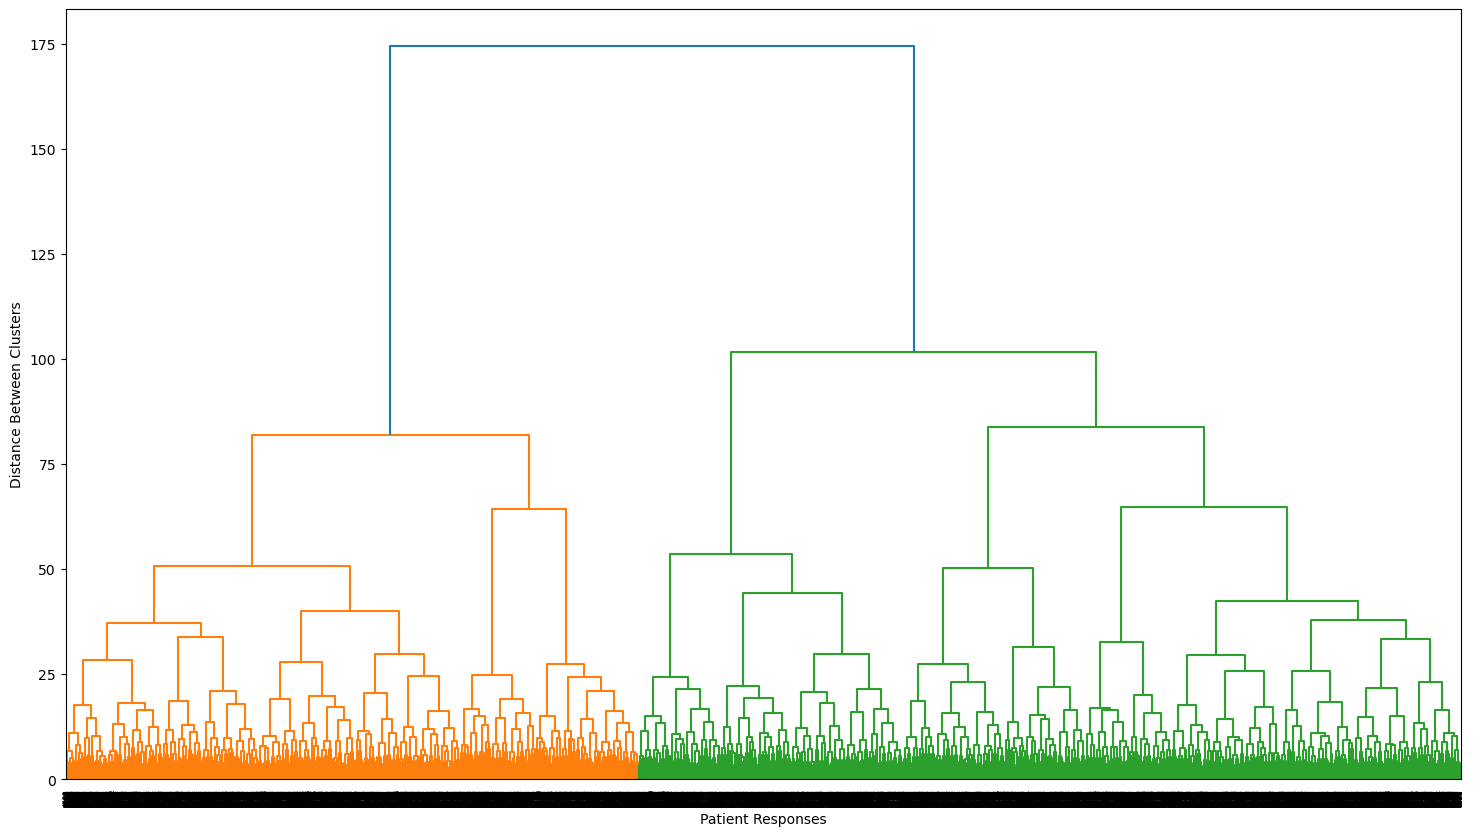

In [20]:
# Use linkage() to run hierarchical clustering using the ward method
distance_matrix = linkage(df[["Item1", "Item2", "Item3", 
                              "Item4", "Item5", "Item6", 
                              "Item7", "Item8"]], 
                          method = 'ward', 
                          metric = 'euclidean')
# Plot Dendrogram
plt.figure(figsize = [18,10])
dendrogram_ward = dendrogram(distance_matrix)
plt.xlabel("Patient Responses")
plt.ylabel("Distance Between Clusters");
plt.show()

In this dendrogram the x axis shows the results of all 10,000 patient responses to the survey, and the y axis shows the distance between the clusters. There are many clusters within this dataset but it's obvious that after using the ward method we have 2 distinct groups with a clear difference between each other based on the dendrogram.

From these two groups we will now use fcluster to label our 2 clusters and create a new column in the dataframe titled cluster_labels. 

In [21]:
# Label Clusters
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

In [22]:
# Counting the population of each cluster
df['cluster_labels'].value_counts()

2    5895
1    4105
Name: cluster_labels, dtype: int64

Now that we have divided our observations into two clusters we can look at the survey results of each question and compare the clusters to each other. 

Text(0, 0.5, 'Number of Patients')

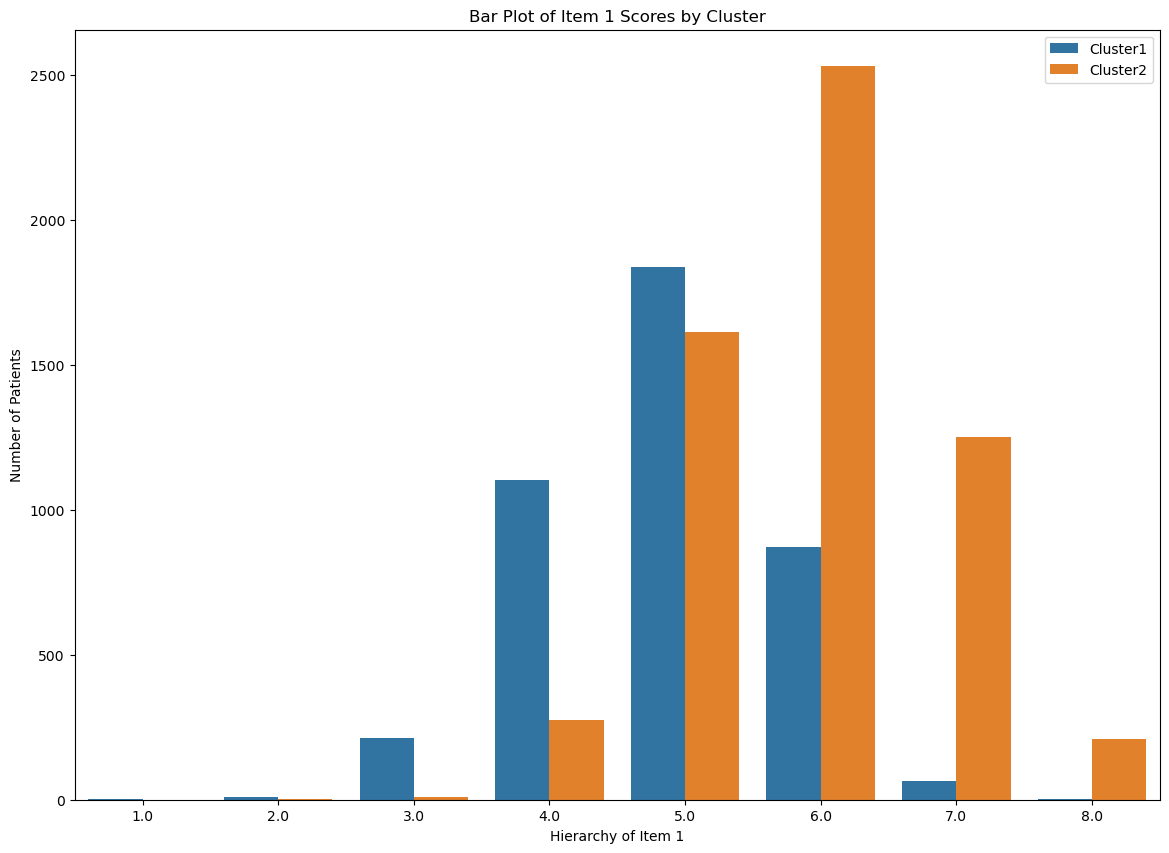

In [23]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 1 Visulizations
plt.title('Bar Plot of Item 1 Scores by Cluster')
sns.countplot(data = df, x="Item1", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 1")
plt.ylabel("Number of Patients")

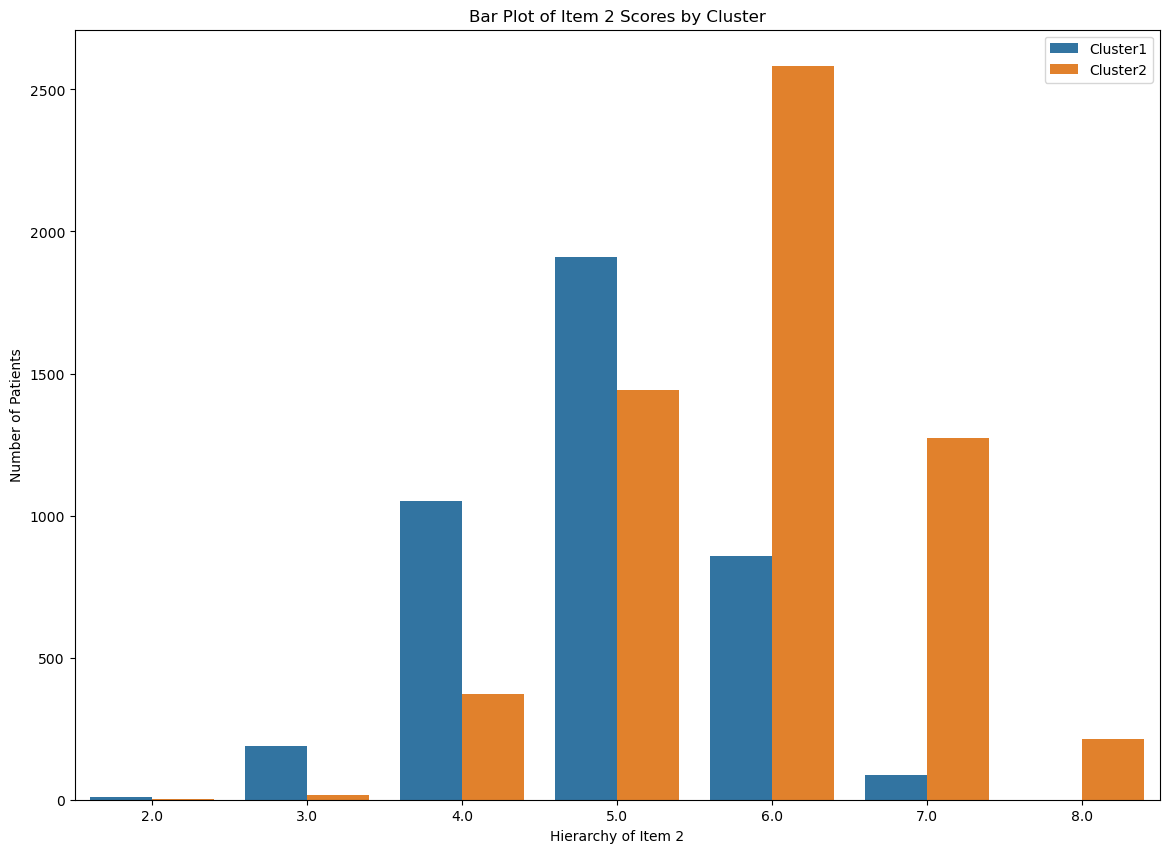

In [24]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 2 Visualization
plt.title("Bar Plot of Item 2 Scores by Cluster")
sns.countplot(data = df, x="Item2", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 2")
plt.ylabel("Number of Patients");

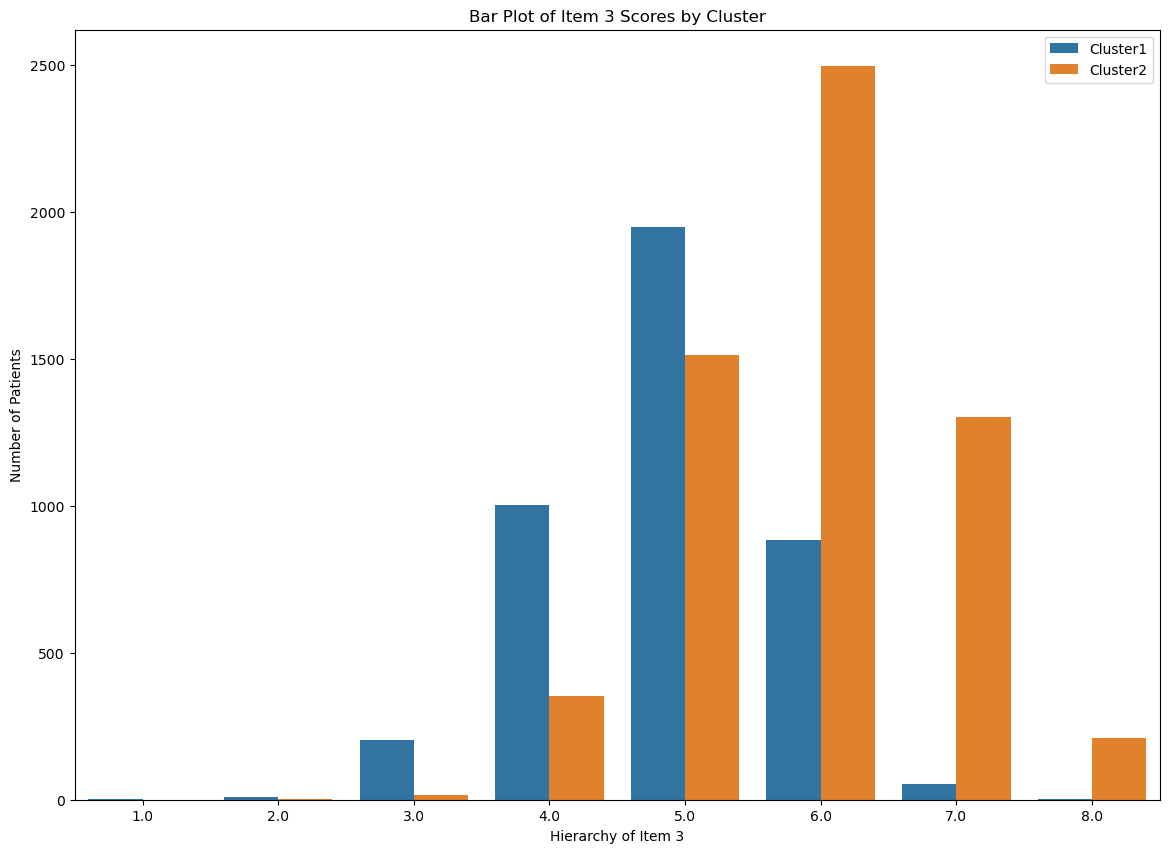

In [25]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 3 Visualization
plt.title('Bar Plot of Item 3 Scores by Cluster')
sns.countplot(data = df, x="Item3", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 3")
plt.ylabel("Number of Patients");

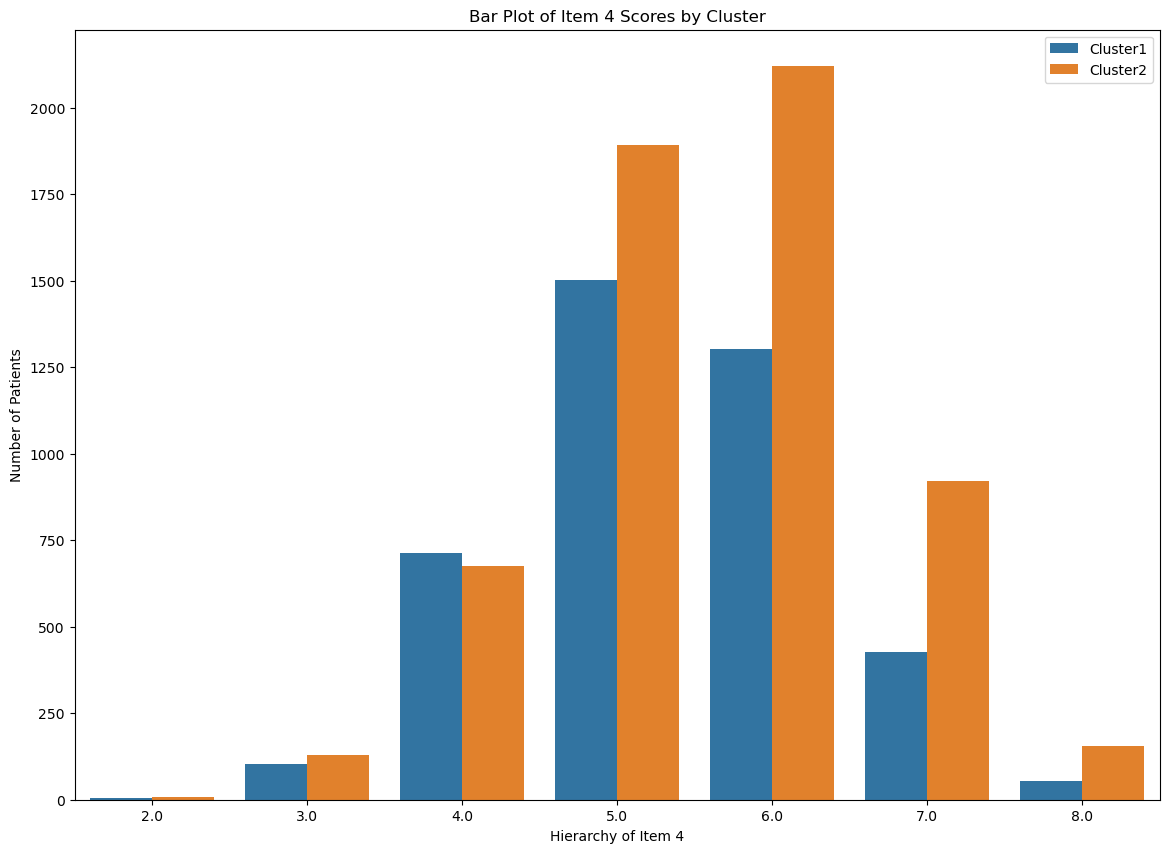

In [26]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 4 Visualization
plt.title("Bar Plot of Item 4 Scores by Cluster")
sns.countplot(data = df, x="Item4", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 4")
plt.ylabel("Number of Patients");

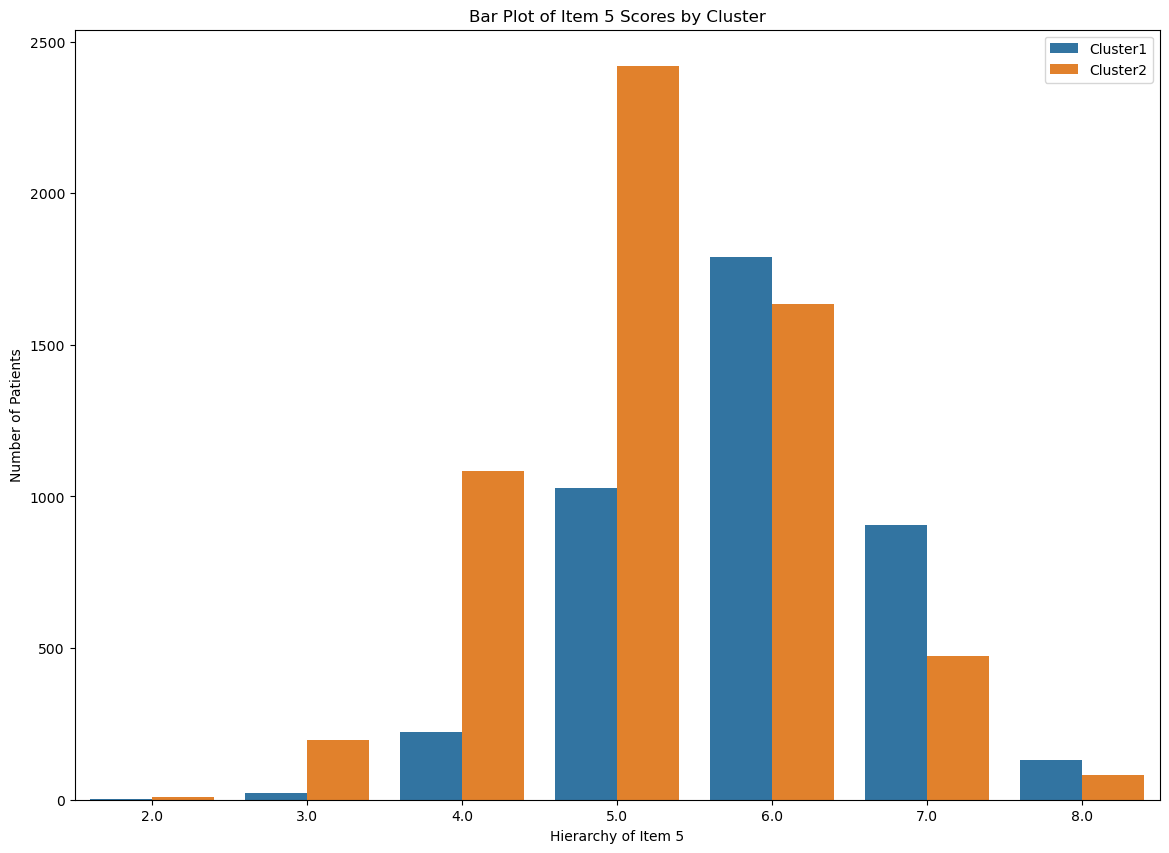

In [27]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 5 Visualization
plt.title('Bar Plot of Item 5 Scores by Cluster')
sns.countplot(data = df, x="Item5", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 5")
plt.ylabel("Number of Patients");

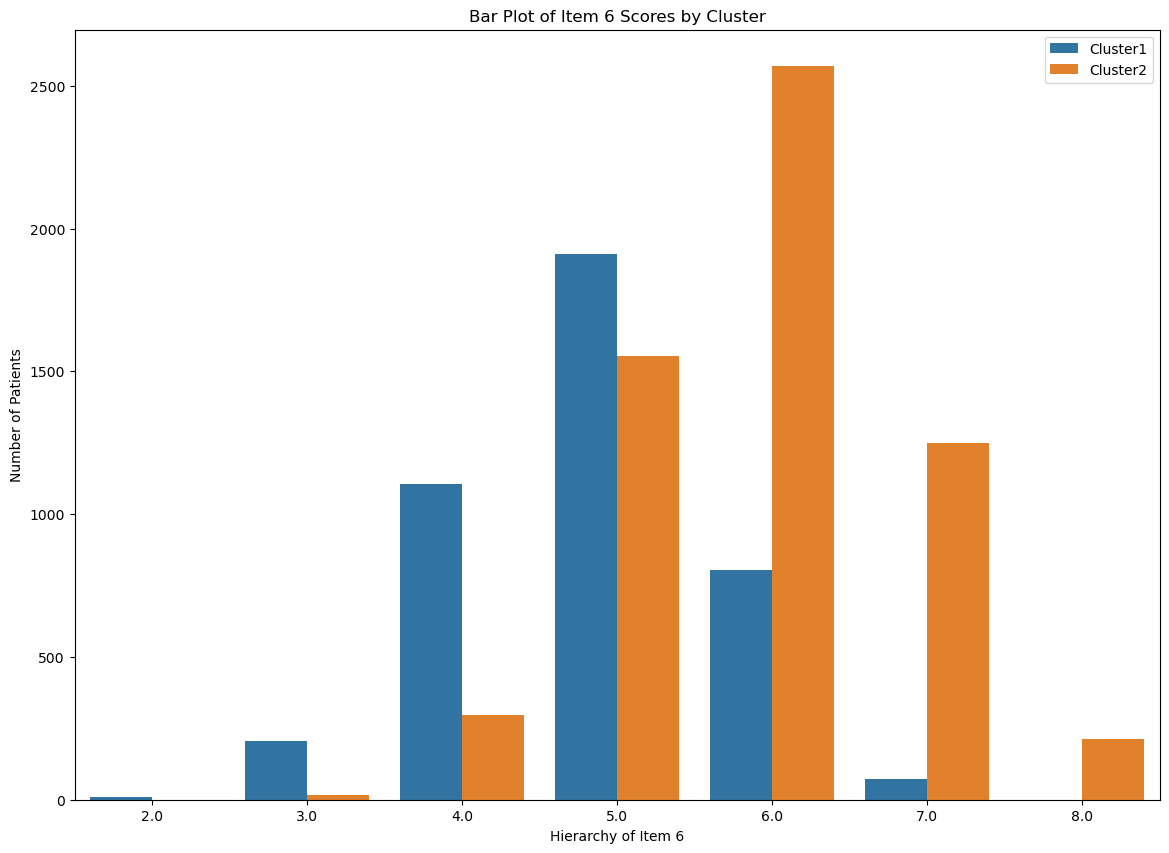

In [28]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 6 Visualization
plt.title("Bar Plot of Item 6 Scores by Cluster")
sns.countplot(data = df, x="Item6", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 6")
plt.ylabel("Number of Patients");

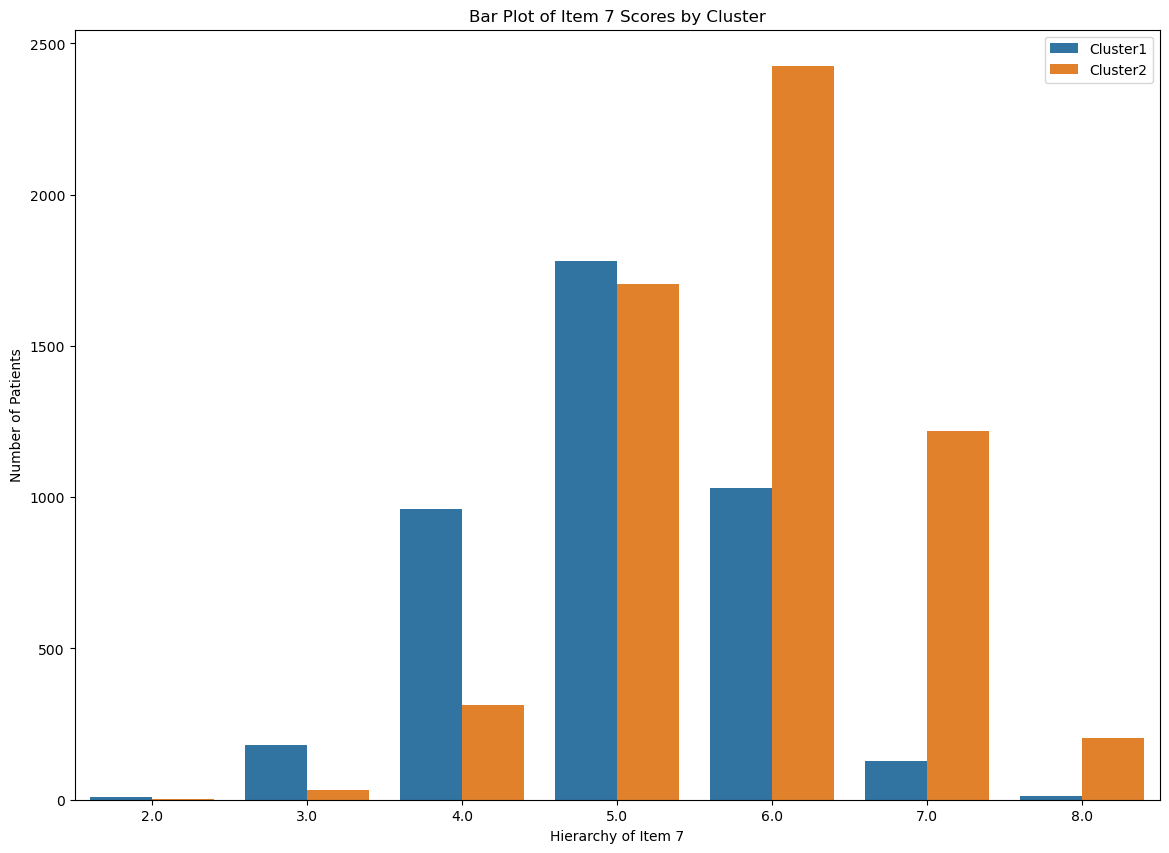

In [29]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 7 Visualization
plt.title('Bar Plot of Item 7 Scores by Cluster')
sns.countplot(data = df, x="Item7", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 7")
plt.ylabel("Number of Patients");

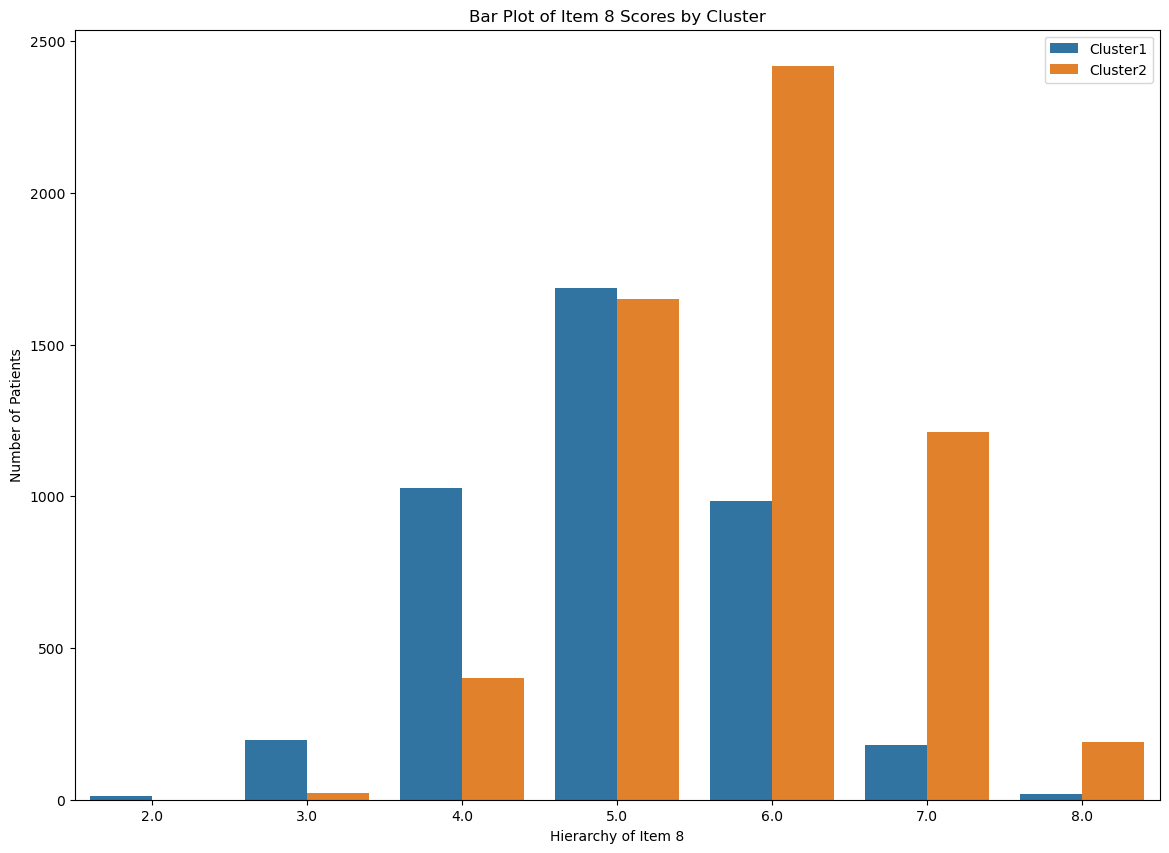

In [30]:
# Size adjustment to make visualization more clear
plt.figure(figsize = [14,10])

# Item 8 Visualization
plt.title("Bar Plot of Item 8 Scores by Cluster")
sns.countplot(data = df, x="Item8", hue="cluster_labels")
plt.legend(["Cluster1", "Cluster2"])
plt.xlabel("Hierarchy of Item 8")
plt.ylabel("Number of Patients");

In [31]:
# Looking at mean scores of each survey response for each cluster
df_grouped = df.groupby('cluster_labels')

df_grouped_means = df_grouped.agg(['mean']).round(2)

print(df_grouped_means)

               Item1 Item2 Item3 Item4 Item5 Item6 Item7 Item8
                mean  mean  mean  mean  mean  mean  mean  mean
cluster_labels                                                
1               4.87  4.90  4.89  5.34  5.90  4.85  4.99  4.99
2               5.91  5.91  5.91  5.59  5.22  5.91  5.86  5.84


In [40]:
# Creat new array to more easily create a visualization
df_plot_dict = {'cluster1' : [4.87, 4.90, 4.89, 5.34, 5.90, 4.85, 4.99, 4.99], 
           'cluster2' : [5.91, 5.91, 5.91, 5.59, 5.22, 5.91, 5.86, 5.84]}
df_plot = pd.DataFrame(data = df_plot_dict, index=['Item1', 'Item2', 
                                                   'Item3', 'Item4', 
                                                   'Item5', 'Item6', 
                                                   'Item7', 'Item8'])
df_plot

,cluster1,cluster2
Item1,4.87,5.91
Item2,4.90,5.91
Item3,4.89,5.91
Item4,5.34,5.59
Item5,5.90,5.22
Item6,4.85,5.91
Item7,4.99,5.86
Item8,4.99,5.84


Text(0, 0.5, 'Average Score')

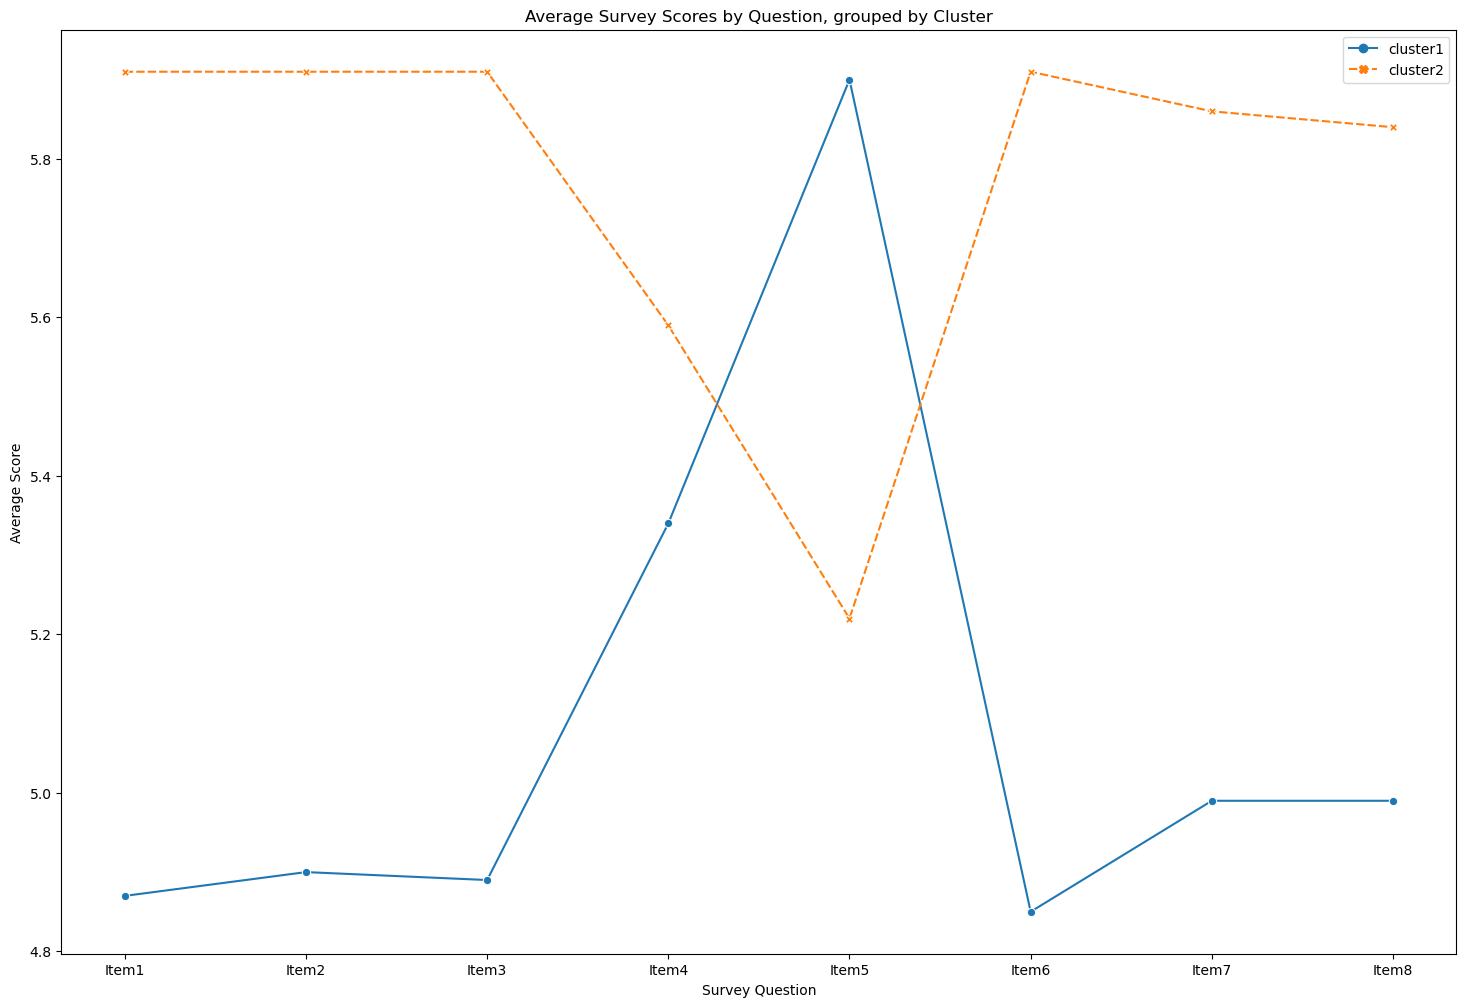

In [41]:
# Visualization of mean scores for each survey item from each cluster
plt.figure(figsize = [18,12])
sns.lineplot(data=df_plot, markers=True)
plt.title("Average Survey Scores by Question, grouped by Cluster")
plt.xlabel("Survey Question")
plt.ylabel("Average Score")

D2.  Provide the code used to perform the clustering analysis technique from part 2.

Code included above

Part V: Data Summary and Implications

E.  Summarize your data analysis by doing the following:

E1.  Explain the accuracy of your clustering technique.

I don't think it's possible to generate a true accuracy score for this type of analysis, however the webinar provided by Dr. Kamara did mention running a silhouette score. After researching silhouette scores I found that it allows us to determine if we have distinct or overlappiong clusters. Score closer to 1 show clusters that are far away, scores closer to 0 show clusters that are overlapping, and scores in the negatives indicate that an incorrect cluster has been assigned. (sklearn.metrics.silhouette_score, 2023)


In [46]:
# Define X and y variables
X = df[["Item1", "Item2", "Item3", 
        "Item4", "Item5", "Item6", 
        "Item7", "Item8"]]

y = df['cluster_labels']

# Generate the silhouette score and print
silhouette_score = silhouette_score(X, y, metric='euclidean')
print(f"Silhouette score is: {round(silhouette_score, 3)}")

Silhouette score is: 0.148


My silhouette score is 0.148. This is very close to zero showing that my two clusters have some degree of overlap. This makes sense when looking at the calculated means and standard deviation from each item and each cluster. The means were very close together and the standard deviations were all close to 1 showing that there isn't a distinct difference between the two clusters.

E2.  Discuss the results and implications of your clustering analysis.

When looking at these numbers and the silhouette score together we can see that the data provided by the survey results is all very middle of the road so to speak.

Let's look at the numbers and visualization again.

In [43]:
df_plot

,cluster1,cluster2
Item1,4.87,5.91
Item2,4.90,5.91
Item3,4.89,5.91
Item4,5.34,5.59
Item5,5.90,5.22
Item6,4.85,5.91
Item7,4.99,5.86
Item8,4.99,5.84


Text(0, 0.5, 'Average Score')

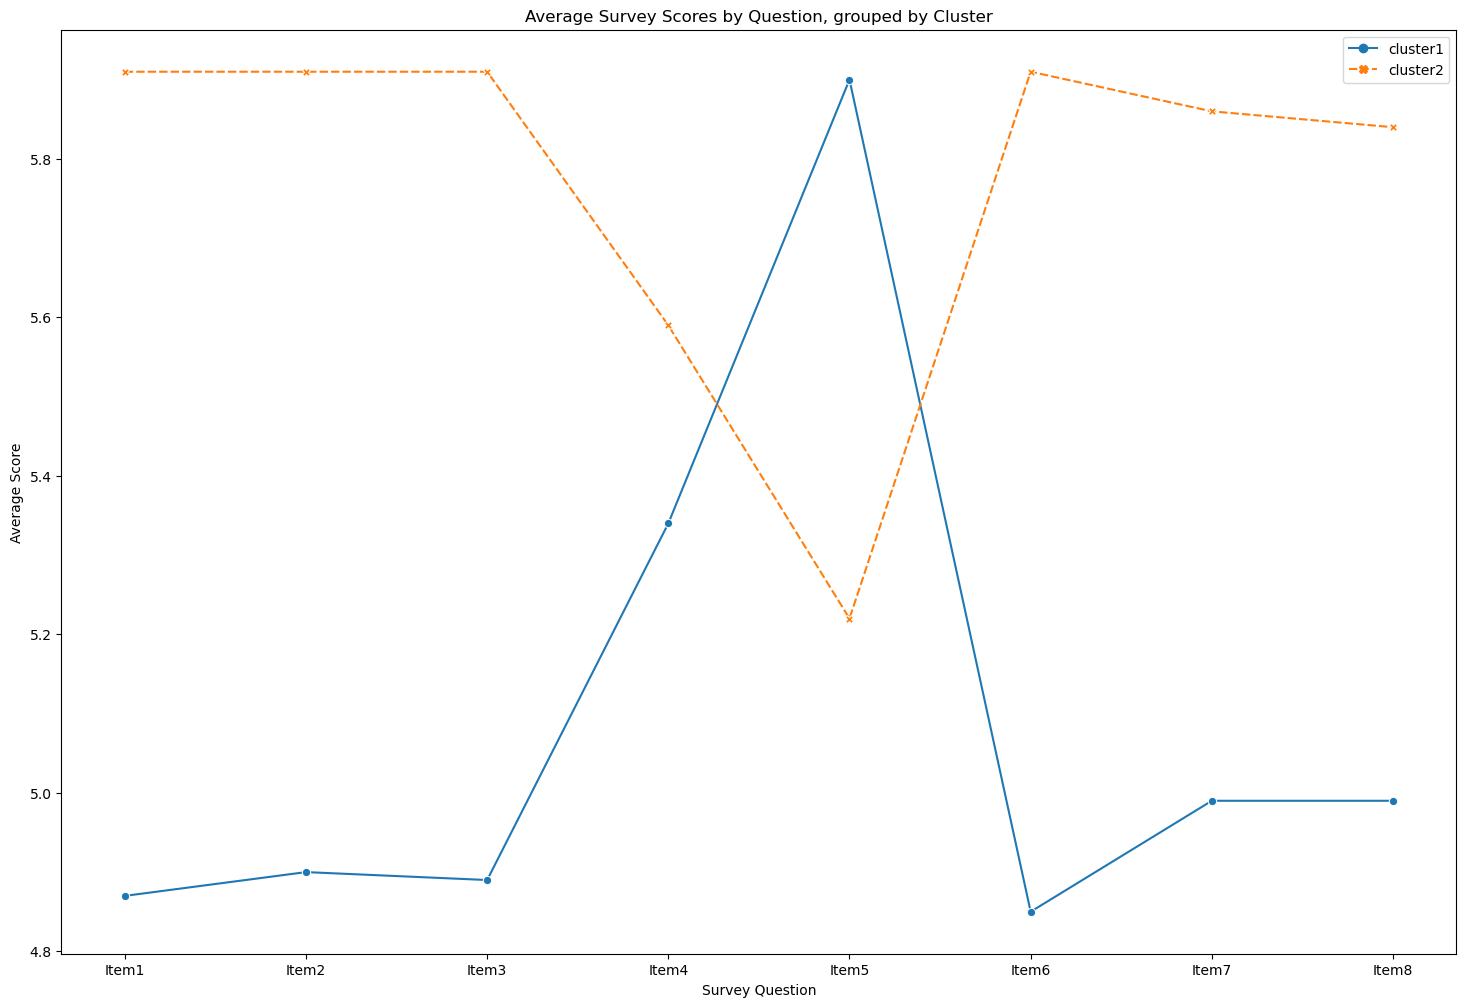

In [44]:
# Visualization of mean scores for each survey item from each cluster
plt.figure(figsize = [18,12])
sns.lineplot(data=df_plot, markers=True)
plt.title("Average Survey Scores by Question, grouped by Cluster")
plt.xlabel("Survey Question")
plt.ylabel("Average Score")

When looking at this again, with the knowlege of the silhouette score, we can clearly see that patients don't really think anything is not important, but also largely don't think anything is very important. The means of responses for all questions in both clusters range anywhere from about 4.90 to 5.90. Showing that largely the patients, regardless of cluster, believe all of these qualities are somewhat important.

E3.  Discuss one limitation of your data analysis.

One limitation in my data analysis is cluster determination. I chose to divide the data into two clusters based on the dendrogram and was shown through my silhouette score that there is definite overlap in the clusters. This shows that I probably could have drilled down deeper and chosen 3 or more clusters to hopefully differentiate my groups more.

E4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

Going back to E2, the two clusters aren't very distinct. I am not sure this is a problem necessarily with the analysis but more so the survey itself. Patients are presented with a number of options, 1-8, to determine how important they are. In their survey 1 means most important whereas 8 means least important. I inverted those numbers for this analysis so that bigger numbers related to more importance as that's a more intuitive way to look at it. 

My recommendation based on this deals with how we handle patient surveys in the future. I think a ranked survey would help to better determine patient priorities. What I mean is that the patients should be offered all 8 items and have to rank them in order of importance. This would require the patients to determine what is most and least important to them in order and hopefully provide us data on what patients find most important so that resources can be focused on those areas.

In this current survey data we can't draw any meaningful conclusions in regards to what patients find most important. With the current analysis patients feel everything is kind of important, but not really. In this case we fall into the trap of if everything is important then nothing is important. Forcing survey participants to actually rank all 8 items in order could help us glean meaningful survey results and more effectively determine what requires more resources.

F.  Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4719bf00-0f05-4359-9b06-b01f014a95a7

G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
 
https://realpython.com/python-map-function/ and https://www.geeksforgeeks.org/python-map-function/ was used for the map functions to perform survey data inversion

https://stackoverflow.com/questions/60006995/round-while-groupping-by-in-pandas-with-agg-function#:~:text=Round(2)%20will%20round%20it,(3)%20and%20so%20on was used for performing the aggregate mean, std, max, and min calculations

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html was used for silhouette score

H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

"Sklearn.Metrics.Silhouette_score." Scikit-learn.Org, 1 Mar. 2023, scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html. Accessed 11 Jun. 2023.